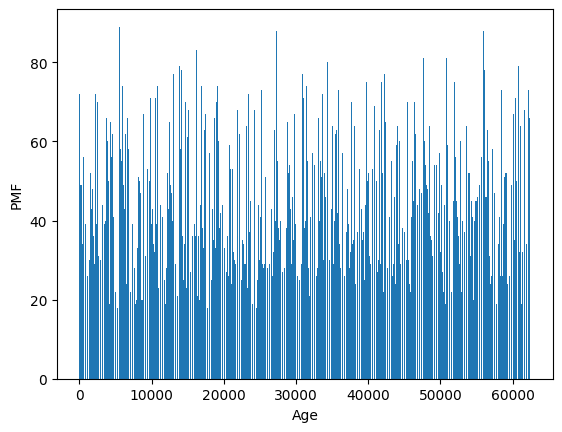

In [3]:
from empiricaldist import Pmf, Cdf
import pandas as pd
import matplotlib.pyplot as plt

# Read the GSS data into a DataFrame
gss = pd.read_hdf('gss.hdf5', 'gss')

# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

In [4]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


In [6]:
income = gss['realinc']

cdf_income = Cdf(income)

# Calculate the 75th percentile
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

0.0


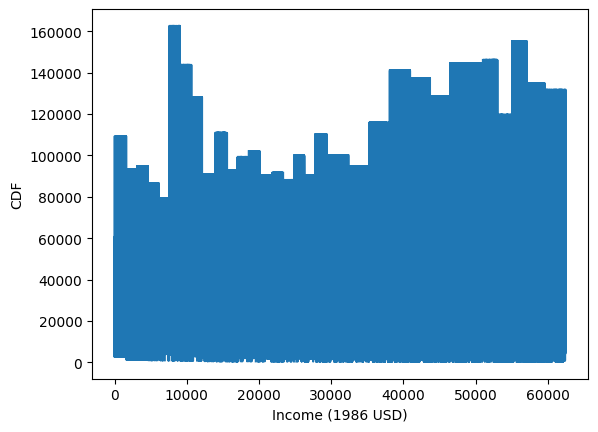

In [17]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

In [18]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = ((educ >= 14) & (educ < 16))

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


In [ ]:
import seaborn as sns

income = gss['realinc']

# Plot the CDFs
sns.kdeplot(Cdf(income[high]), label='High school')
sns.kdeplot(Cdf(income[assc]), label='Associate')
sns.kdeplot(Cdf(income[bach]), label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

<Axes: >

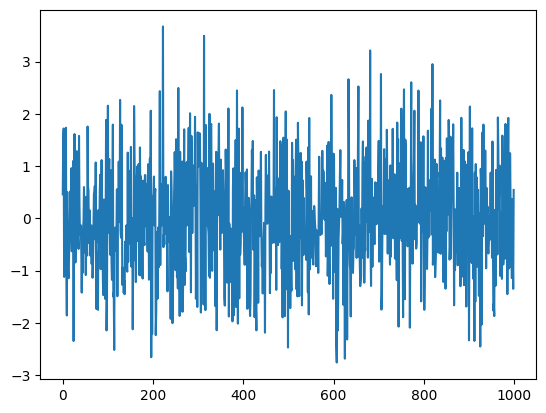

In [2]:
import numpy as np
from empiricaldist import Cdf

sample = np.random.normal(size=1000)
Cdf(sample).plot()

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt

xs = np.linspace(-3, 3)
# creates a normal distribution with mean=0 and std=1
ys = norm(0, 1).cdf(xs)

plt.plot(xs, ys, color='gray')

Cdf(sample).plot()
plt.show()

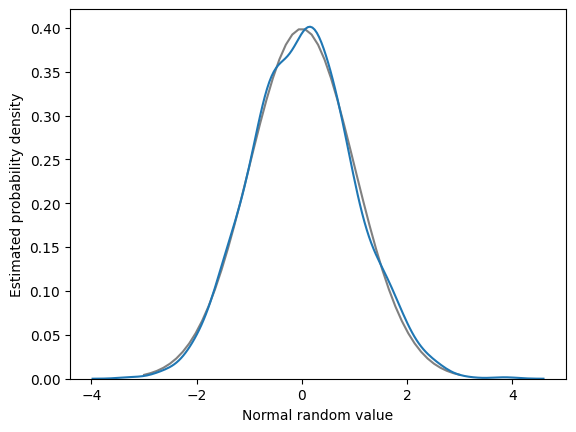

In [62]:
import seaborn as sns

np.random.seed(42)
sample = np.random.normal(size=1000)

xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
plt.xlabel('Normal random value')
plt.ylabel('Estimated probability density')
sns.kdeplot(sample)
plt.show()

In [70]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677934171 0.42900437330100427


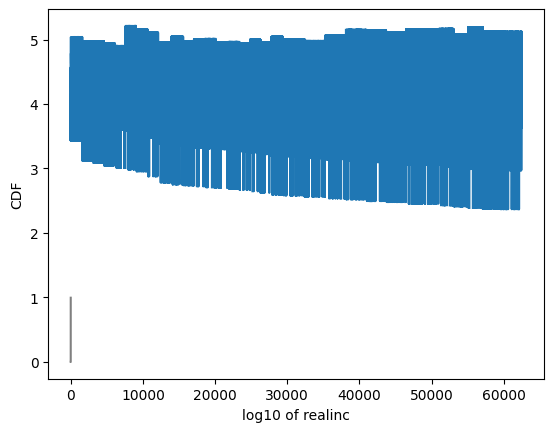

In [73]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
plt.plot(Cdf(log_income))

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

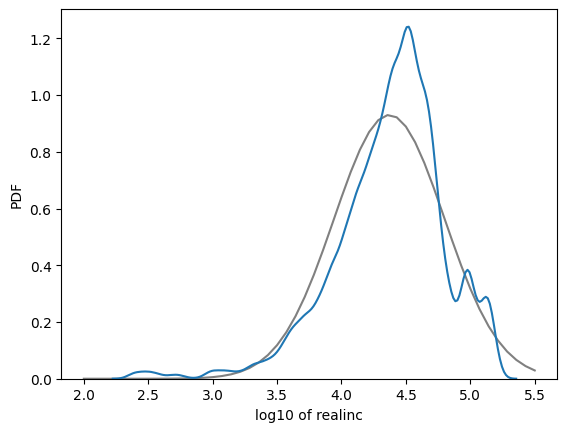

In [74]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()